<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter3/accrejgamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!python --version

Python 3.7.11


# Example 3.5
## Import modules

In [34]:
from math import exp, gamma, log
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

1.19.5


## Set random seed

In [35]:
np.random.seed(12)

## Original Program

In [36]:
alpha = 1.3
lam = 5.6
f = lambda x: lam**alpha * x**(alpha-1) * exp(-lam*x)/gamma(alpha)
g = lambda x: lam*exp(-lam*x)  ## the lam is the same as the one in f
C = 1.2
found = False
while not found:
   x = - log(rand())/lam
   if C*g(x)*rand() <= f(x):
      found = True
print(x)

0.3338831816413133


## Reproduce Figure 3.2

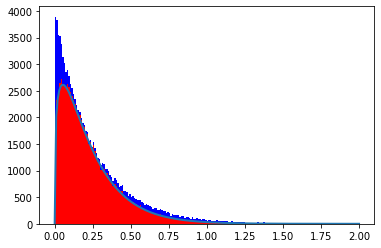

In [39]:
n_sample = 100000
binsize = 200
sampling_f = []
lam_exp = 4
gg = lambda x: lam_exp*exp(-1*lam_exp*x)  ## exp. function with lambda = lam_exp = 4, to replace the g in the original program
accept = rand(n_sample)  ## U
xx = - np.log(rand(n_sample))/lam_exp  ## Sampling from Exp(4) distribution
for i in range(n_sample):
  if C*gg(xx[i])*accept[i] <= f(xx[i]): ## if CgU <= f , to check the original program is correct or not, just replace gg with g
    sampling_f.append(xx[i])    ## Accept as Gamma distribution

# Scale f function to check if it fits the Gamma distribution sampling
y2,binEdges2 = np.histogram(sampling_f,bins=binsize, range=(0.0,2.0))
bincenters2 = 0.5*(binEdges2[1:]+binEdges2[:-1])
y2C = y2[5]/f(bincenters2[5])

## Draw
xf = np.linspace(0,2,num=binsize)
fxf = []
for i in range(binsize):
  fxf.append(f(xf[i])*y2C)

h = plt.plot(xf, fxf, lw=2)
plt.hist(xx, color='b', bins = np.arange(0,2,0.01))
plt.hist(sampling_f, color='r', bins = np.arange(0.,2,0.01))
#plt.yscale('log')
plt.show()
